In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv(r"dataset/boston.csv", header=0)
# data.drop(["class"], axis=1, inplace=True)
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
class LinearRegression:
    '''使用梯度下降回归算法'''
    def __init__(self, learning_rate, times):
        '''初始化
        parameters
        -----
        learn_rate: 学习率。梯度下降步长 
        times: 迭代次数
        '''
        self.learning_rate = learning_rate
        self.times = times
    def fit(self, X, y):
        '''对样本进行预测
        Parameters:
        X: 特征矩阵，可以是List也可以是Ndarray，形状为： [样本数量,特征数量]
        y: 标签数组
        '''
        X = np.asarray(X)
        y = np.asarray(y)
        # 创建权重，初始值为0(也可以试试其他值)，* 长度比X特征数多1，多出的就是w0
        self.w_ = np.zeros(1 + X.shape[1]) # X.shape[1] 为特征数
        # 创建损失值列表，用来每次迭代的损失值。
        # 损失值计算公式：(1/2 )*( 预测值 - 真实值)^2
        self.loss_ = []
        # 开始迭代
        for x in range(self.times):
            # 为什么使用 self.w_[1:] ？ 因为X特征个数比w少1个，所以这里w0先去掉，点乘后再加上
            # 矩阵可以使用*运算，但是这里是ndarray数组只能用点乘，1表示x0
            y_hat = np.dot(X, self.w_[1:]) + self.w_[0]
            # 计算误差
            error = y - y_hat
            # 将损失值加入损失列表
            self.loss_.append(np.sum(error**2)/2)
            # 根据差距调整权重w_
            # 调整为 w(j)=w(j)+learn_rate*sum((y - y_hat)*x(j))
            # 更新w0，x看成1直接更新
            self.w_[0] += self.learning_rate * np.sum(error * 1)
            # ****************************************************
            # ************  重点：这里一定要搞明白 ***************
            # ****************************************************
            # 使用x1到xn的某一列向量(即某一特征)的转置来更新w，也就是将w向x进拟合
            self.w_[1:] += self.learning_rate * np.dot(X.T, error)
    def predict(self, X):
        '''根据参数进行预测
        Paramaters
        -----
        X： [样本数量, 特征数量]
        -----
        Returns: 预测结果
        '''
        X = np.asarray(X)
        result = np.dot(X, self.w_[1:]) + self.w_[0]
        return result

In [4]:
class StandardScaler:
    '''对数据集进行标准化处理'''
    def fit(self, X):
        '''根据传递的样本，计算每个特征列的均值和标准差
        Parameters
        -----
        X: 训练数据。用来计算均值和标准差
        '''
        X = np.asarray(X)
        self.std_ = np.std(X, axis=0) # 按列计算标准差
        self.mean_ = np.mean(X, axis=0) # 按列计算#值
    def transform(self, X):
        '''对给定数据进行标准化处理
        * 将X每一列都变成标准正太分布的形式，即满足均值为0，标准差为1
        * 标准化也叫标准差标准化，经过处理的数据符合标准正态分布。
        
        Parameters
        -----
        X: 类数组类型。待转换的数据
        '''
        return (X - self.mean_) / self.std_
    def fit_transform(self, X):
        ''' fit后transform
        '''
        self.fit(X)
        return self.transform(X)

In [5]:
lr = LinearRegression(learning_rate=0.001, times=20)
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]
lr.fit(train_X, train_y)
result = lr.predict(test_X)
# display(result)
display(np.mean((result - test_y)**2))
display(lr.w_)
display(lr.loss_)

1.1804176210461773e+210

array([-2.68833075e+099, -7.57608494e+101, -1.29174503e+100,
       -2.67102000e+100, -3.24034515e+100, -1.81386180e+098,
       -1.52555272e+099, -1.67597187e+100, -1.90402088e+101,
       -9.69839266e+099, -3.06079801e+100, -1.19382162e+102,
       -5.02206239e+100, -9.48116678e+101, -3.57226707e+100])

[116831.44,
 2083552221174028.0,
 4.883479637283036e+25,
 1.14536821770387e+36,
 2.686348040018552e+46,
 6.300564127408661e+56,
 1.477735116047291e+67,
 3.465881830645266e+77,
 8.128883677155966e+87,
 1.9065494170189406e+98,
 4.4716234404365476e+108,
 1.0487751334726054e+119,
 2.4597985390359684e+129,
 5.769214638613026e+139,
 1.353112339006075e+150,
 3.1735914100271017e+160,
 7.443345350908508e+170,
 1.7457631703262697e+181,
 4.09451517185836e+191,
 9.603281119422997e+201]

In [6]:
# 为了避免每个特征数量级的不同对梯度下降造成的影响。我们对每个特征进行标准化
lr = LinearRegression(learning_rate=0.0005, times=20)
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:400, :-1]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, :-1]
test_y = t.iloc[400:, -1]

# 标准化
ss = StandardScaler()
train_X = ss.fit_transform(train_X)
test_X = ss.fit_transform(test_X)
ss2 = StandardScaler()
train_y = ss2.fit_transform(train_y)
test_y = ss2.fit_transform(test_y)

# 训练 预测
lr.fit(train_X, train_y)
result = lr.predict(test_X)
display(np.mean((result - test_y)**2))
display(lr.w_)
display(lr.loss_)

0.14911890500740144

array([ 1.47715173e-16, -2.67726470e-03, -7.77999440e-02,  3.22218582e-02,
       -4.15123849e-02,  7.21847299e-02, -1.22496354e-01,  3.18411097e-01,
       -8.44203177e-03, -2.09306424e-01,  1.02744566e-01, -5.29297011e-02,
       -1.81988334e-01,  9.71339528e-02, -3.93923586e-01])

[200.0,
 109.56340745551384,
 89.24537638439179,
 79.69665810311717,
 74.15994999919499,
 70.76479029645887,
 68.5986097420355,
 67.15477786507567,
 66.1444617646852,
 65.4007703140392,
 64.82595473196506,
 64.36185638542904,
 63.973228857262946,
 63.638247945534275,
 63.343061508525125,
 63.07862649070146,
 62.83885168788381,
 62.619493019046615,
 62.41748706751545,
 62.23054285212329]

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams["font.family"] = "SimHei"
mpl.rcParams["axes.unicode_minus"] = False

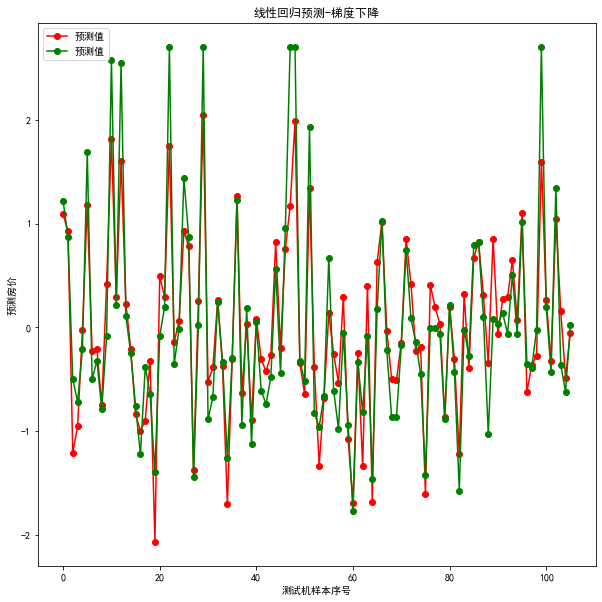

In [8]:
plt.figure(figsize=(10,10))
plt.plot(result, "ro-", label="预测值")
plt.plot(test_y.values, "go-", label="预测值") # pandas读取时serise类型，我们需要转为ndarray
plt.title("线性回归预测-梯度下降")
plt.xlabel("测试机样本序号")
plt.ylabel("预测房价")
plt.legend()
plt.show()

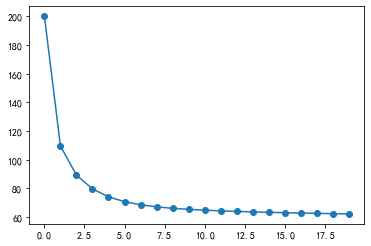

In [137]:
# 绘制累计误差值
plt.plot(range(1,lr.times+1),lr.loss_, "o-")

In [115]:
# 因为放假更新涉及多个维度，不方便可视化
# 为了可视化，我们只选择其中一个维度（RM），并画出直线，进行拟合
lr = LinearRegression(learning_rate=0.0005, times=20)
t = data.sample(len(data), random_state=0)
train_X = t.iloc[:400, 6:7]
train_y = t.iloc[:400, -1]
test_X = t.iloc[400:, 5:6]
test_y = t.iloc[400:, -1]
# 标准化
ss = StandardScaler()
train_X = ss.fit_transform(train_X)
test_X = ss.fit_transform(test_X)
ss2 = StandardScaler()
train_y = ss2.fit_transform(train_y)
test_y = ss2.fit_transform(test_y)
lr.fit(train_X, train_y)
result = lr.predict(test_X)
# display(result)
display(np.mean((result - test_y)**2))


2.002805351917207

array([-3.05755421e-16,  6.54993957e-01])

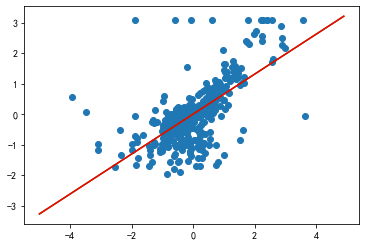

In [128]:
# 展示rm对对于价格的影响
plt.scatter(train_X["rm"], train_y)
# 展示权重
display(lr.w_)
# 构建方程 y = w0 + x*w1 = -3.05755421e-16 + x *  6.54993957e-01
x = np.arange(-5,5,0.1)
y = -3.05755421e-16 + x *  6.54993957e-01
plt.plot(x, y, "g") # 绿色直线显示我们的拟合直线
# *********  x.reshape(-1,1) 把一维转为二位 ****************
plt.plot(x, lr.predict(x.reshape(-1,1)), 'r')

# 可以看到我们预测的和你和的完全重合了